# Spectral Rotations

Spectral rotation visualizer gif. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fooof.sim import gen_power_spectrum
from fooof.sim.transform import rotate_sim_spectrum

In [2]:
import seaborn as sns
sns.set_context('poster')

In [3]:
# Import custom code
from vcode.plts import plot_spectra, plot_bar
from vcode.gif import clear_output, animate_plot
from vcode.utils import incrementer

## SETTINGS

In [4]:
# Simulation settings
f_range = [1, 50]

ap_def = [1, 1]
osc_def = [10, 0.5, 0.5]

In [5]:
# Settings for example
delta = 0.25
f_rot = 15

In [6]:
# Plot settings
ylim = np.log10([0.1, 25])

In [7]:
# Define the rotation points to use
f_rotations = [10, 20, 30, 40, 50, 40, 30, 20, 10, 1]

# Define the delta exponents to use
delta_exps = [0., 0.1, 0.2, 0.3, 0.4, 0.5,
              0.4, 0.4, 0.2, 0.1, 0.,
             -0.1, -0.2, -0.3, -0.4, -0.5, 
             -0.4, -0.3, -0.2, -0.1, 0.]

In [8]:
# Set whether to save out
SAVE = False

## DEFINE AXES

In [9]:
def make_axes():
    
    fig = plt.figure(figsize=(12, 4), constrained_layout=True)
    gs = fig.add_gridspec(4, 3)
    ax1 = fig.add_subplot(gs[0:, 0])
    ax2 = fig.add_subplot(gs[0:, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.axis('off')
    ax4 = fig.add_subplot(gs[1:, 2])
    
    return fig, ax1, ax2, ax3, ax4

## SIMULATE DATA

In [10]:
freqs1, powers1, params1 = gen_power_spectrum(f_range, ap_def, osc_def, return_params=True)

In [11]:
powers2, params2 = rotate_sim_spectrum(freqs1, powers1, delta, f_rot, params1)

In [12]:
d_off = params2.aperiodic_params[0] - params1.aperiodic_params[0]

## EXAMPLE PLOT

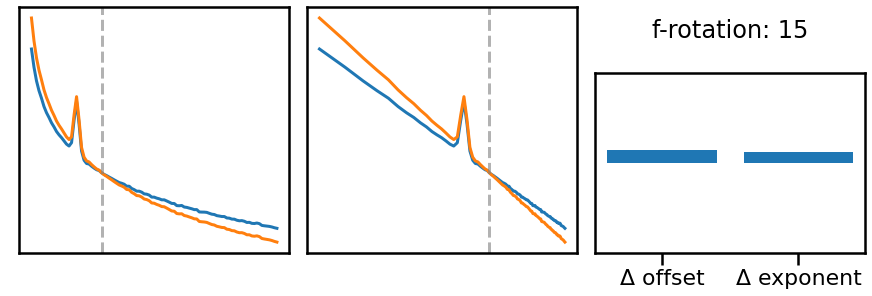

In [13]:
fig, ax1, ax2, ax3, ax4 = make_axes()
plot_spectra(freqs1, [powers1, powers2], log_freqs=False, log_powers=True, ax=ax1)
ax1.axvline(f_rot, linestyle='--', alpha=0.6, color='grey')
plot_spectra(freqs1, [powers1, powers2], log_freqs=True, log_powers=True, ax=ax2)
ax2.axvline(np.log10(f_rot), linestyle='--', alpha=0.6, color='grey')
ax3.text(0.5, 0.5, 'f-rotation: {}'.format(f_rot), 
        horizontalalignment='center', verticalalignment='center');
plot_bar(d_off, delta, ax=ax4)

## BUILDER FUNCTION

In [14]:
def build_all(f_rotations, delta_exps, sleep=0.05, save=False):
    
    ind = incrementer()
    for f_rot in f_rotations:
        
        for d_exp in delta_exps:
            
            powers2, params2 = rotate_sim_spectrum(freqs1, powers1, d_exp, f_rot, params1)
            d_off = params2.aperiodic_params[0] - params1.aperiodic_params[0]
            
            clear_output(wait=True)
            
            fig, ax1, ax2, ax3, ax4 = make_axes()
            plot_spectra(freqs1, [powers1, powers2], alpha=0.75, ylim=ylim,
                         log_freqs=False, log_powers=True, ax=ax1)
            ax1.axvline(f_rot, linestyle='--', alpha=0.6, color='grey')
            plot_spectra(freqs1, [powers1, powers2], alpha=0.75, ylim=ylim,
                         log_freqs=True, log_powers=True, ax=ax2)
            ax2.axvline(np.log10(f_rot), linestyle='--', alpha=0.6, color='grey')
            
            ax3.text(0.5, 0.5, 'f-rotation: {}'.format(f_rot), 
                horizontalalignment='center', verticalalignment='center');
            
            plot_bar(d_off, d_exp, ax=ax4)
            ax4.axhline(0, color='black', alpha=0.5)

            animate_plot(fig, save, next(ind), 'specrot', sleep)

## ANIMATED PLOT

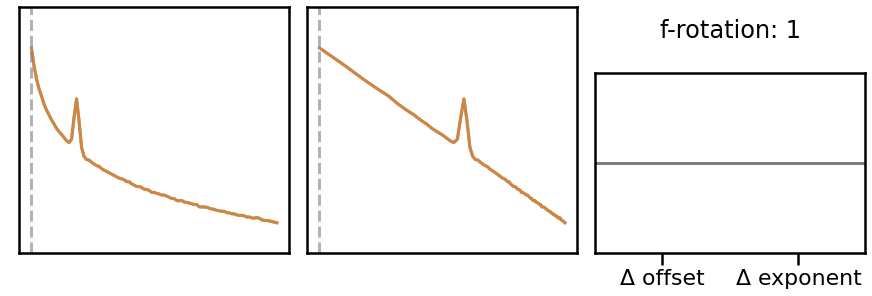

In [15]:
build_all(f_rotations, delta_exps, save=SAVE)